In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('/Users/owencrew/Downloads/rfm_data.csv')

In [3]:
rfm_scores = df[['Recency', 'Frequency', 'Monetary']]

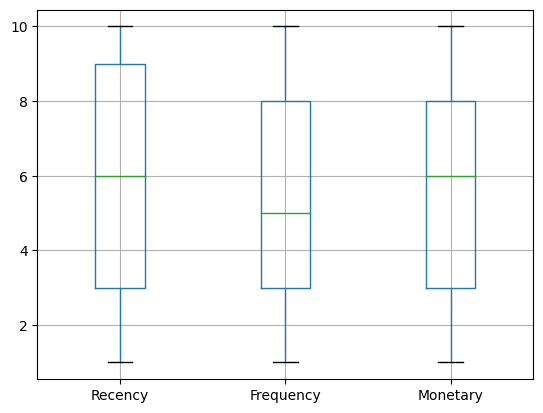

In [4]:
rfm_scores.boxplot()
plt.show()

In [5]:
# set the number of clusters to 3
kmeans = KMeans(n_clusters=3)

In [23]:
# Normalize the RFM scores
rfm_data_norm = (rfm_scores - rfm_scores.mean()) / rfm_scores.std()

In [24]:
# fit the k-means model to the RFM scores
kmeans.fit(rfm_data_norm)

/Users/owencrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [25]:
# add the cluster labels to the original dataframe
df['cluster'] = kmeans.labels_

In [26]:
# print the number of customers in each cluster
print(df['cluster'].value_counts())

1    13512
0    11487
2    10323
Name: cluster, dtype: int64


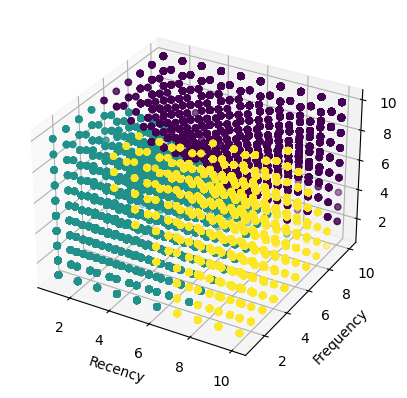

In [27]:
# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['cluster'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()